<a href="https://colab.research.google.com/github/Vipul-Parasar/New-York-Taxi-Fare-Prediction/blob/main/Machine_learning_protfolio_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New York City Taxi Fare Prediction

![](https://i.imgur.com/ecwUY8F.png)

Dataset Link: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

We'll train a machine learning model to predict the fare for a taxi ride in New York city given information like pickup date & time, pickup location, drop location and no. of passengers.

Here's an outline of the project:

1. Download the dataset
2. Explore & analyze the dataset
3. Prepare the dataset for ML training
4. Train hardcoded & baseline models
5. Make predictions & submit to Kaggle
6. Peform feature engineering
7. Train & evaluate different models
8. Tune hyperparameters for the best models
9. Train on a GPU with the entire dataset
10. Document & publish the project online

## 1.Download The Dataset

In [ ]:
!pip install opendatasets scikit-learn --quiet

In [ ]:
from google.colab import drive

# Mount my Google Drive to the Colab VM.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import opendatasets as od
# vipulpr
# fbdd929068458093e2b676d6dfccc23f

download_url ='https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vipulpr
Your Kaggle Key: ··········


100%|██████████| 1.56G/1.56G [00:12<00:00, 133MB/s]



Extracting archive ./new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to ./new-york-city-taxi-fare-prediction


In [ ]:
data_dir = 'new-york-city-taxi-fare-prediction'

### View dataset files
- lets look at the size, no. of lines and first few lines of each file

In [ ]:
!ls -lh {data_dir}

total 5.4G
-rw-r--r-- 1 root root  486 Sep  6 20:37 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Sep  6 20:37 sample_submission.csv
-rw-r--r-- 1 root root 960K Sep  6 20:37 test.csv
-rw-r--r-- 1 root root 5.4G Sep  6 20:38 train.csv


In [ ]:
!wc -l {data_dir}/train.csv

55423856 new-york-city-taxi-fare-prediction/train.csv


training set has 55.4 million rows

In [ ]:
!wc -l {data_dir}/test.csv

9914 new-york-city-taxi-fare-prediction/test.csv


testing data has 9914 lines

In [ ]:
!wc -l {data_dir}/sample_submission.csv

9915 new-york-city-taxi-fare-prediction/sample_submission.csv


sample_submission also contain 9915 rows

In [ ]:
!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [ ]:
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

test set doesnot contain any fare_amount column, we have to calculate fare_amount of test data and then upload to kaggle

In [ ]:
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


Observations:

- This is a supervised learning problem
- Training data is 5.5 GB in size
- Training data has 55.4 million rows
- Test set is much smaller (< 10,000 rows)
- The training set has 8 columns:
    - key (a unique identifier)
    - fare_amount (target column)
    - pickup_datetime
    - pickup_longitude
    - pickup_latitude
    - dropoff_longitude
    - dropoff_latitude
    - passenger_count
- The test set has all columns except the target column fare_amount.
- The submission file should contain the key and fare_amount for each test sample.

## 2.Data Prepration

- When working with large data set , we will start with a sample dataset to experiment and iterate faster.
- Also we will use some techniques to load data to Pandas faster and use less memory.
    - drop columns: select a subset of columns relevant for analysis
    - use smaller dtypes: we don't see any need as of now


In [ ]:
# we will make a 1% sample of data.
# we will drop key column , because it is just unique identifier, it wont have any say in our prediction
# giving data types to each column

import pandas as pd
import random

sample_frac = .01

selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')

dtypes = {
    'fare_amount' : 'float32',
    'pickup_longitude' : 'float32',
    'pickup_latitude' : 'float32',
    'dropoff_longitude' : 'float32',
    'dropoff_latitude' : 'float32',
    'passenger_count' : 'uint8'
}

random.seed(15)
def skip_row(row_idx):
  if row_idx ==0:
    return False
  return (random.random()>sample_frac)


df = pd.read_csv(data_dir+'/train.csv',
                 usecols=selected_cols,
                 dtype=dtypes,
                 parse_dates=['pickup_datetime'],
                 skiprows=skip_row)


In [ ]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.7,2011-02-22 11:09:16+00:00,-73.968880,40.764534,-73.985313,40.748955,1
1,6.5,2013-05-20 11:03:50+00:00,-73.980736,40.747910,-73.970528,40.761997,1
2,19.0,2014-08-21 10:21:17+00:00,-73.974022,40.762829,-73.940842,40.726467,1
3,6.1,2009-07-16 18:04:00+00:00,-73.953430,40.766766,-73.968445,40.764900,1
4,7.5,2012-10-01 09:02:00+00:00,-73.986717,40.761520,-73.968674,40.796661,2
...,...,...,...,...,...,...,...
553917,14.1,2009-09-22 00:49:36+00:00,-73.981285,40.741398,-73.940468,40.699265,1
553918,6.9,2010-07-27 15:31:00+00:00,-73.976105,40.748714,-73.990417,40.751270,1
553919,11.0,2013-11-01 23:02:42+00:00,-73.983589,40.773537,-73.969719,40.800022,1
553920,5.7,2011-03-16 06:24:01+00:00,-73.992844,40.743095,-73.976990,40.761127,1


In [ ]:
test_df= pd.read_csv(data_dir+'/test.csv',
                 dtype=dtypes,
                 parse_dates=['pickup_datetime'])

In [ ]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6


In [ ]:
# are there any duplicates?

dup_ = df[df.duplicated()]
dup_.shape[0],(dup_.shape[0]/df.shape[0])*100

(0, 0.0)

In [ ]:
# is there any missing values?

df.isna().sum().sort_values(ascending=False)

,0
dropoff_longitude,6
dropoff_latitude,6
fare_amount,0
pickup_longitude,0
pickup_datetime,0
pickup_latitude,0
passenger_count,0


there are just 6 missing co-ordinates for dropoff, lets just drop those rows

In [ ]:
df=df.dropna();

In [ ]:
#lets find missing values again
df.isna().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553916 entries, 0 to 553921
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        553916 non-null  float32            
 1   pickup_datetime    553916 non-null  datetime64[ns, UTC]
 2   pickup_longitude   553916 non-null  float32            
 3   pickup_latitude    553916 non-null  float32            
 4   dropoff_longitude  553916 non-null  float32            
 5   dropoff_latitude   553916 non-null  float32            
 6   passenger_count    553916 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 19.5 MB


In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,553916.000000,553916.000000,553916.000000,553916.000000,553916.000000,553916.000000
mean,11.331641,-72.512138,39.926746,-72.527771,39.928486,1.686416
std,9.728076,11.782752,10.064701,12.325903,7.984922,1.309992
min,-52.000000,-1183.314575,-2528.967285,-2491.214600,-1797.750000,0.000000
25%,6.000000,-73.992058,40.735062,-73.991371,40.734146,1.000000
50%,8.500000,-73.981766,40.752739,-73.980156,40.753193,1.000000
75%,12.500000,-73.967026,40.767101,-73.963638,40.768120,2.000000
max,420.000000,3253.483887,3210.337402,2425.810059,3292.723389,6.000000


In [ ]:
df.pickup_datetime.min(), df.pickup_datetime.max()

(Timestamp('2009-01-01 00:16:11+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:30+0000', tz='UTC'))

Observations about training data:

- 550k+ rows, as expected
- no duplicates in data
- fare_amount ranges from \$-52.0 to \$420.0
- passenger_count ranges from 0 to 6
- Dates range from 1st Jan 2009 to 30th June 2015

We may need to deal with outliers and data entry errors before we train our model.


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float32            
 6   passenger_count    9914 non-null   uint8              
dtypes: datetime64[ns, UTC](1), float32(4), object(1), uint8(1)
memory usage: 319.6+ KB


In [ ]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273
std,0.042799,0.033542,0.039093,0.035436,1.278747
min,-74.252190,40.573143,-74.263245,40.568974,1.000000
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696682,6.000000


In [ ]:
test_df.pickup_datetime.min(), test_df.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

Some observations about the test set:

- 9914 rows of data
- No missing values
- No obvious data entry errors
- 1 to 6 passengers
- Latitudes lie between 40 and 42
- Longitudes lie between -75 and -72
- Pickup dates range from Jan 1st 2009 to Jun  30th 2015 (same as training set)

We can use the ranges of the test set to drop outliers/invalid data from the training set.

In [ ]:
# limiting our ranges to drop outliers

df = df[(df['pickup_latitude'] >= 40) & (df['pickup_latitude'] <= 42) &
        (df['pickup_longitude'] >= -75) & (df['pickup_longitude'] <= -72) &
        (df['dropoff_latitude'] >= 40) & (df['dropoff_latitude'] <= 42) &
        (df['dropoff_longitude'] >= -75) & (df['dropoff_longitude'] <= -72)]

In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,542335.000000,542335.000000,542335.000000,542335.000000,542335.000000,542335.000000
mean,11.313064,-73.975098,40.751122,-73.974281,40.751469,1.686596
std,9.621934,0.219194,0.088439,0.218605,0.089404,1.309853
min,-34.799999,-74.939392,40.116501,-74.945206,40.115704,0.000000
25%,6.000000,-73.992271,40.736675,-73.991554,40.735765,1.000000
50%,8.500000,-73.982071,40.753448,-73.980614,40.753899,1.000000
75%,12.500000,-73.968246,40.767517,-73.965271,40.768410,2.000000
max,420.000000,-72.063202,41.983334,-72.077332,41.895714,6.000000


## 3.Data Visualisation

Text(0, 0.5, 'Number of Passengers')

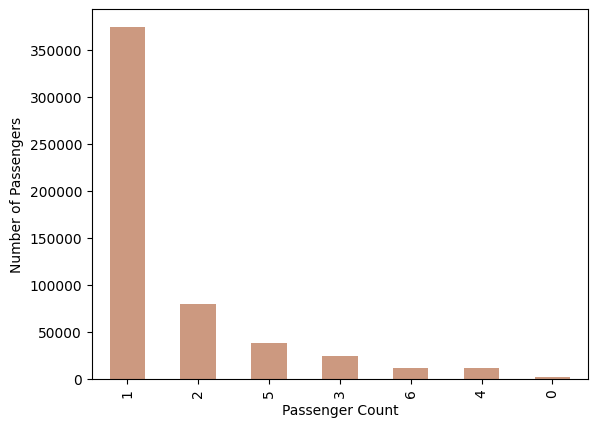

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

passengers = df['passenger_count'].value_counts()

custom_color=(0.8, 0.6, 0.5)

passengers.plot.bar(color=custom_color)

plt.xlabel('Passenger Count')
plt.ylabel('Number of Passengers')

Text(0, 0.5, 'Number of Passengers')

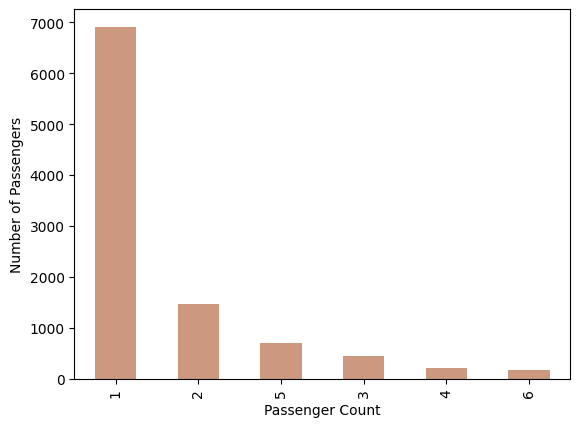

In [ ]:
test_passengers = test_df['passenger_count'].value_counts()

test_passengers.plot.bar(color=custom_color)

plt.xlabel('Passenger Count')
plt.ylabel('Number of Passengers')

/tmp/ipython-input-3144074060.py:1: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.3`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(df['fare_amount'], color=(0.9,0.1,0.6),bw=0.3)


Text(0.5, 1.0, 'Distribution of Amounts')

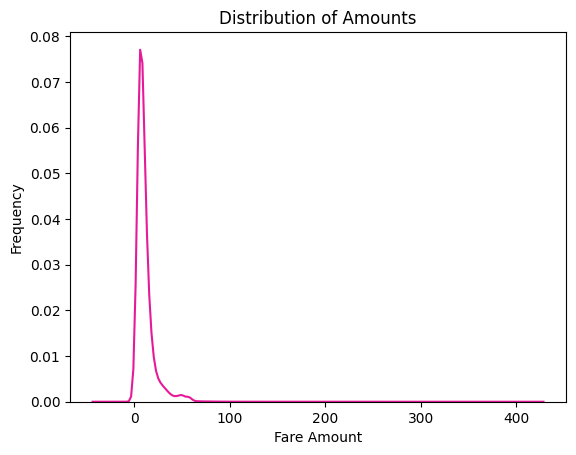

In [ ]:
sns.kdeplot(df['fare_amount'], color=(0.9,0.1,0.6),bw=0.3)

plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Amounts')

<Axes: xlabel='pickup_longitude', ylabel='pickup_latitude'>

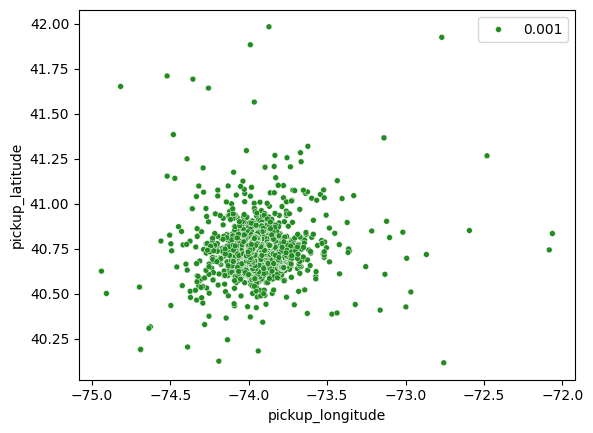

In [ ]:
sns.scatterplot(x=df.pickup_longitude,y=df.pickup_latitude, size=0.001,color=(34/255,139/255,34/255))

<Axes: xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

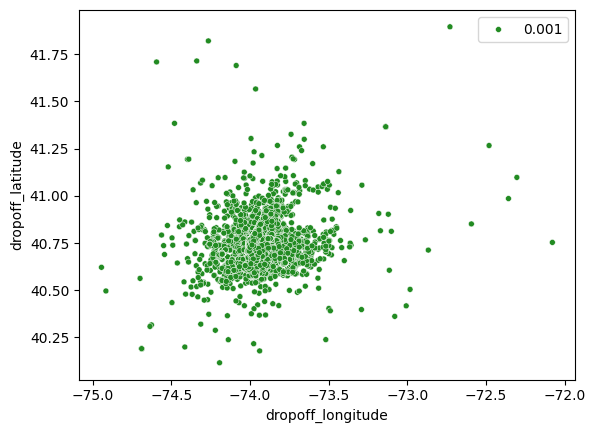

In [ ]:
sns.scatterplot(x=df.dropoff_longitude,y=df.dropoff_latitude, size=0.001, color=(34/255,139/255,34/255))

<Axes: xlabel='pickup_longitude', ylabel='pickup_latitude'>

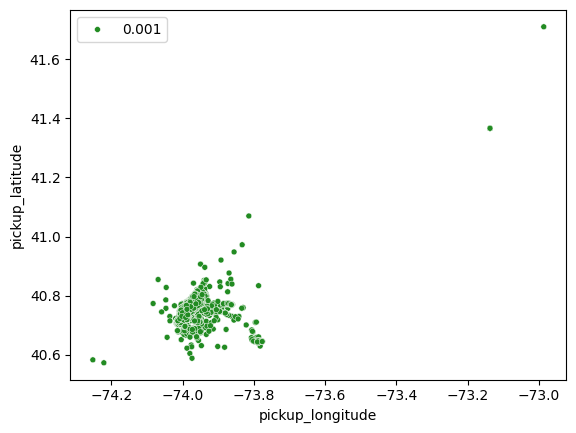

In [ ]:
sns.scatterplot(x=test_df.pickup_longitude,y=test_df.pickup_latitude, size=0.001,color=(34/255,139/255,34/255))

<Axes: xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

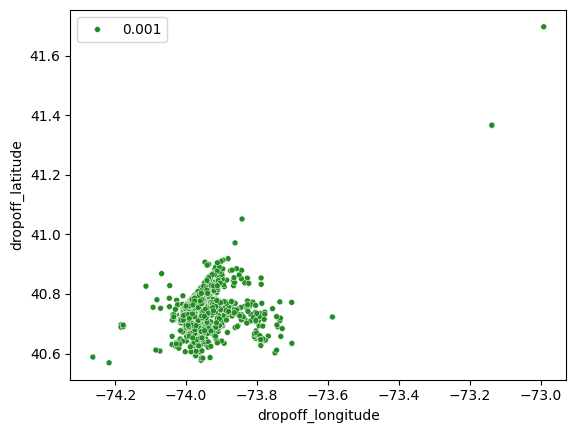

In [ ]:
sns.scatterplot(x=test_df.dropoff_longitude,y=test_df.dropoff_latitude, size=0.001, color=(34/255,139/255,34/255))

## 4.Quetions and Answers

1. What is the busiest day of the week?
2. What is the busiest time of the day?
3. In which month are fares the highest?
4. Which pickup locations have the highest fares?
5. Which drop locations have the highest fares?
6. What is the average ride displacement?
7. is there yearly increase in avg taxi price due to inflation?

 etc etc

EDA + asking questions will help you develop a deeper understand of the data and give you ideas for feature engineering.

Text(0, 0.5, 'Number of taxis hired')

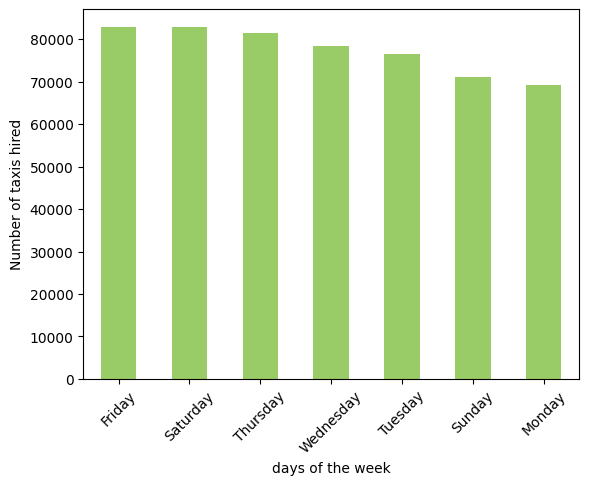

In [ ]:
# busiest day of the week

busiest_day=df['pickup_datetime'].dt.dayofweek.value_counts()

day_mapping ={
    0:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'
}

busiest_day.index=busiest_day.index.map(day_mapping)

busiest_day.plot.bar(color=(.6,.8,.4))

plt.xticks(rotation=45)
plt.xlabel('days of the week')
plt.ylabel('Number of taxis hired')

Friday and saturday are busiest day of the week and monday is the least busiest day. here are some of the possible reasons

-  New York is known for having a high percentage of commuters who use public transportation, such as the subway or buses, to get to work. If many people are commuting via public transportation, they may be less likely to need a taxi on Monday mornings.

- New York City is a popular tourist destination, and many visitors come to the city on weekends. If there are fewer tourists in the city on Mondays, there may be less demand for taxis.

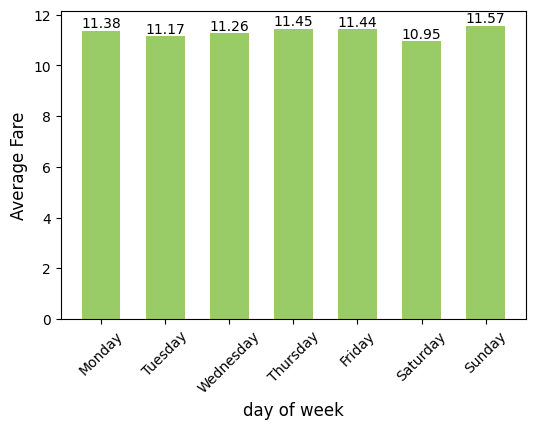

In [ ]:
# is the average fare same on each day?

day_name=pd.Series(df.pickup_datetime.dt.dayofweek.unique()).sort_values()
average_fare_each_day=[]

for items in day_name:
  average_fare_each_day.append(df[df.pickup_datetime.dt.dayofweek==items].fare_amount.sum()/len(df[df.pickup_datetime.dt.dayofweek==items]))

day_mapping ={
    0:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'
}

day_name=day_name.map(day_mapping)

plt.rcParams["figure.figsize"] = (6,4)

plt.bar(day_name,average_fare_each_day,width=0.6,color=(.6,.8,.4))
plt.xlabel('day of week', fontsize=12)
plt.ylabel('Average Fare', fontsize=12)
plt.xticks(rotation=45)

for i, val in enumerate(average_fare_each_day):
    plt.text(i, val, f"{val:.2f}", ha='center', va='bottom')

plt.show()

It seems there is no co relation between fare_amount and day of the week

Text(0, 0.5, 'Number of taxis hired')

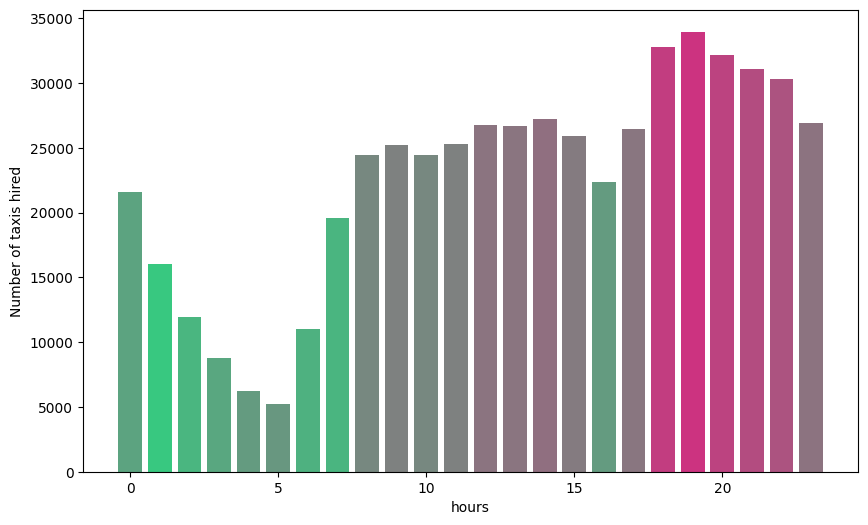

In [ ]:
import matplotlib.colors as mcolors

busiest_hour=df['pickup_datetime'].dt.hour.value_counts().sort_index()

plt.rcParams["figure.figsize"] = (10,6)

colors = [(0.5,.5,.5),(0.2,.8,0.5), (.8,0.2,0.5)]
cmap = mcolors.LinearSegmentedColormap.from_list("my_colormap", colors)
plt.bar(busiest_hour.index,busiest_hour, color=cmap(busiest_hour/busiest_hour.max()))
plt.xlabel('hours')
plt.ylabel('Number of taxis hired')


There are several factors that could contribute to the increase in taxi hire around 5 pm to 11 pm in New York:

- Rush hour: During this time, many people are leaving work or traveling home, which leads to a higher demand for transportation.

- Dinner and entertainment: Many people go out for dinner and entertainment in the evening, which increases the demand for transportation.

- Tourists: New York City is a popular tourist destination, and many tourists may choose to explore the city in the evening.

- Nightlife: New York City has a vibrant nightlife, with many bars, clubs, and events happening in the evening. This can also contribute to the increase in taxi hire during this time.

Text(0, 0.5, 'Number of taxis hired')

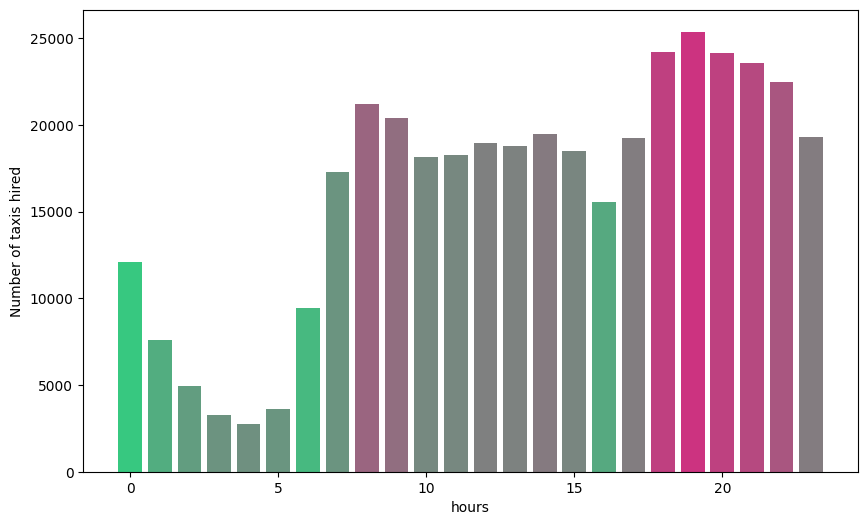

In [ ]:
# is the pattern same on weekdays and weekends?

# weekdays

weekday_pickups = df[df['pickup_datetime'].dt.weekday.isin([0, 1, 2, 3, 4])]
busiest_hours_on_weekdays = weekday_pickups['pickup_datetime'].dt.hour.value_counts().sort_index()

plt.rcParams["figure.figsize"] = (10,6)

colors = [(0.5,.5,.5),(0.2,.8,0.5), (.8,0.2,0.5)]
cmap = mcolors.LinearSegmentedColormap.from_list("my_colormap", colors)
plt.bar(busiest_hours_on_weekdays.index,busiest_hours_on_weekdays, color=cmap(busiest_hours_on_weekdays/busiest_hours_on_weekdays.max()))
plt.xlabel('hours')
plt.ylabel('Number of taxis hired')

Text(0, 0.5, 'Number of taxis hired')

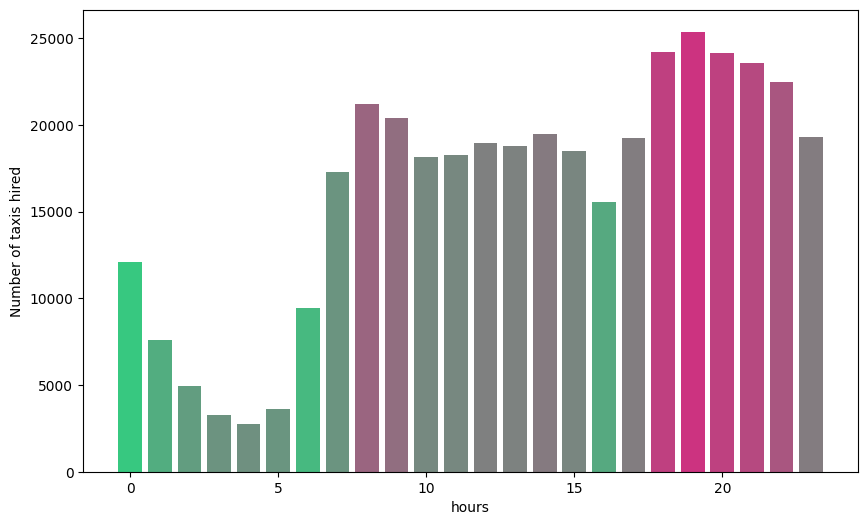

In [ ]:
# weekends

weekend_pickups = df[df['pickup_datetime'].dt.weekday.isin([5,6])]
busiest_hours_on_weekends = weekday_pickups['pickup_datetime'].dt.hour.value_counts().sort_index()

plt.rcParams["figure.figsize"] = (10,6)

colors = [(0.5,.5,.5),(0.2,.8,0.5), (.8,0.2,0.5)]
cmap = mcolors.LinearSegmentedColormap.from_list("my_colormap", colors)
plt.bar(busiest_hours_on_weekends.index,busiest_hours_on_weekends, color=cmap(busiest_hours_on_weekends/busiest_hours_on_weekends.max()))
plt.xlabel('hours')
plt.ylabel('Number of taxis hired')

pattern is almost same for weekdays and weekends

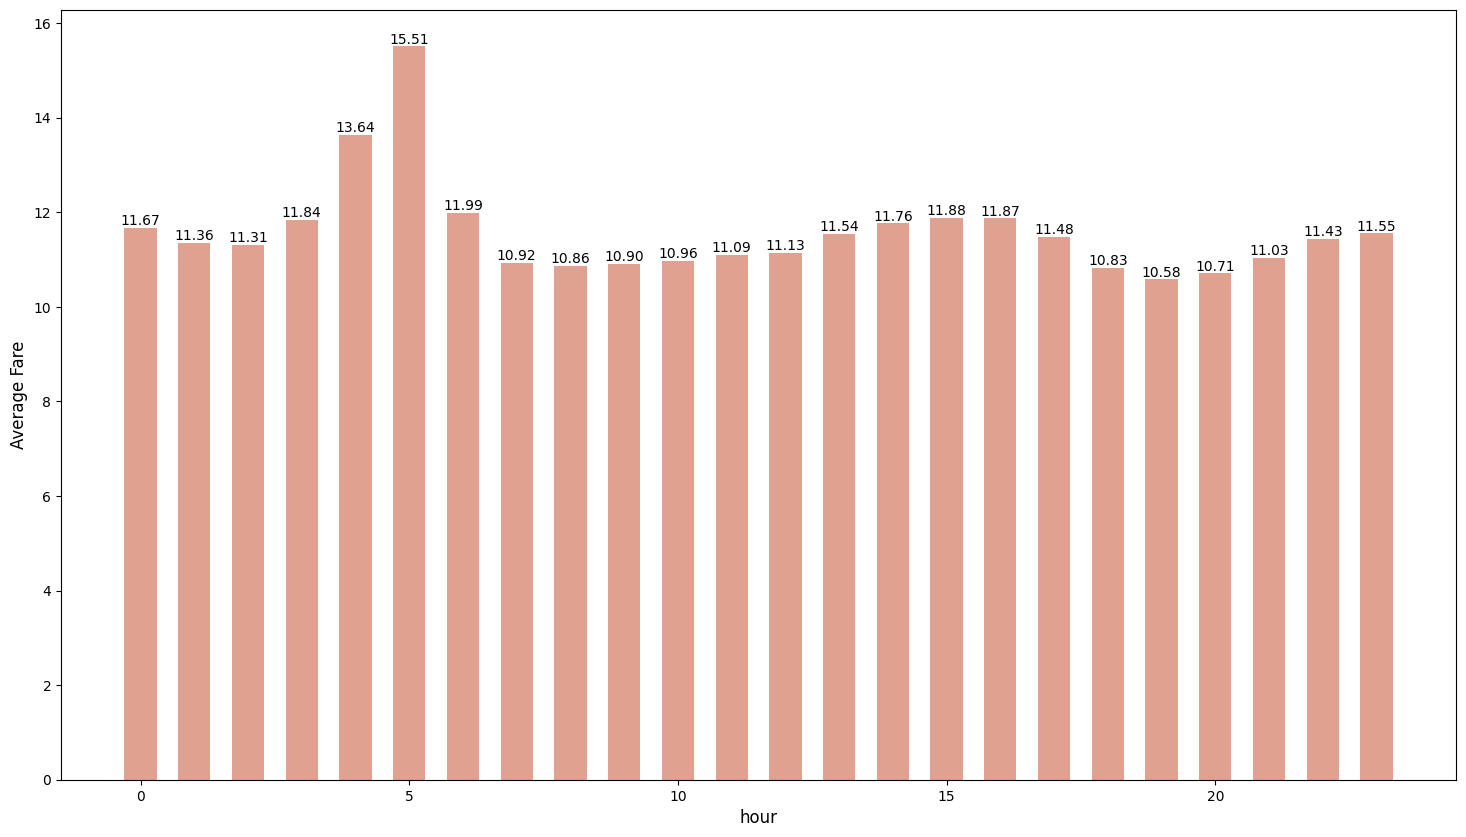

In [ ]:
# is there any increase in average fare during rush hours?

hour=pd.Series(df.pickup_datetime.dt.hour.unique()).sort_values()
average_fare_per_hour=[]

for items in hour:
  average_fare_per_hour.append(df[df.pickup_datetime.dt.hour==items].fare_amount.sum()/len(df[df.pickup_datetime.dt.hour==items]))

plt.rcParams["figure.figsize"] = (18,10)

plt.bar(hour,average_fare_per_hour,width=0.6,color=(0.88,.63,.57))
plt.xlabel('hour', fontsize=12)
plt.ylabel('Average Fare', fontsize=12)

for i, val in enumerate(average_fare_per_hour):
    plt.text(i, val, f"{val:.2f}", ha='center', va='bottom')

plt.show()

averge fare is almost same for each hour , except during early morning hours

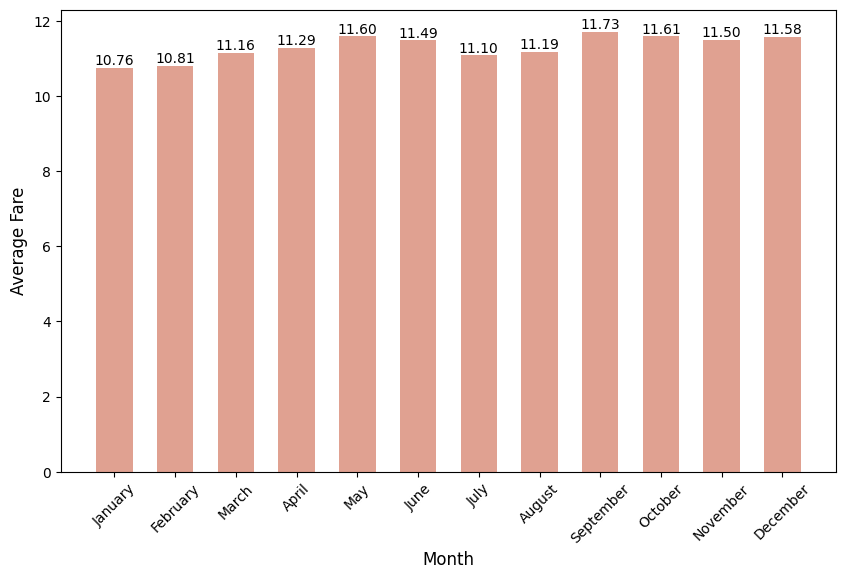

In [ ]:
month=pd.Series(df.pickup_datetime.dt.month.unique()).sort_values()
average_fare_per_month=[]

for items in month:
  average_fare_per_month.append(df[df.pickup_datetime.dt.month==items].fare_amount.sum()/len(df[df.pickup_datetime.dt.month==items]))

month_mapping = {
    1:'January',
    2:'February',
    3:'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'August',
    9:'September',
    10:'October',
    11:'November',
    12:'December'
}
month_names = [month_mapping[m] for m in month]

plt.rcParams["figure.figsize"] = (10,6)

plt.bar(month_names,average_fare_per_month,width=0.6,color=(0.88,.63,.57))
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Fare', fontsize=12)
plt.xticks(rotation=45)

for i, val in enumerate(average_fare_per_month):
    plt.text(i, val, f"{val:.2f}", ha='center', va='bottom')

plt.show()

there isn't any significant difference in average fare over the months

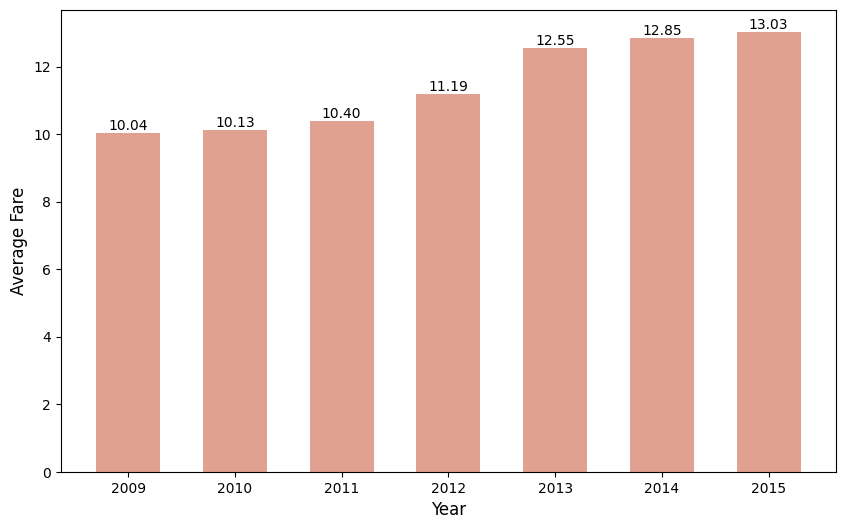

In [ ]:
year=pd.Series(df.pickup_datetime.dt.year.unique()).sort_values()
average_fare_per_year=[]

for items in year:
  average_fare_per_year.append(df[df.pickup_datetime.dt.year==items].fare_amount.sum()/len(df[df.pickup_datetime.dt.year==items]))

fig, ax = plt.subplots()
rects = ax.bar(year,average_fare_per_year,width=0.6,color=(0.88,.63,.57))

# add text labels to bars
for i, rect in enumerate(rects):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, "{:.2f}".format(average_fare_per_year[i]),
            ha='center', va='bottom')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Fare', fontsize=12)
plt.xticks(rotation=0)
plt.show()

It is clearly visible that the average fare is increasing every year

In [ ]:
# finding the top 0.1% pickup locations which have highest fare

fare_amount_threshold = df["fare_amount"].quantile(0.999)

top_df = df[df["fare_amount"] >= fare_amount_threshold]

top_locations_pickup = [(lat, lon) for lat, lon in zip(top_df["pickup_latitude"], top_df["pickup_longitude"])]

# plotting top locations on map

import folium

map = folium.Map()

# Add a marker for each location using a for loop
for location in top_locations_pickup:
    folium.Marker(location).add_to(map)

# Display the map
display(map)

In [ ]:
# finding the top 0.1% dropoff locations which have highest fare

top_locations_dropoff = [(lat, lon) for lat, lon in zip(top_df["dropoff_latitude"], top_df["dropoff_longitude"])]

# plotting top locations on map

import folium

map = folium.Map()

# Add a marker for each location using a for loop
for location in top_locations_dropoff:
    folium.Marker(location).add_to(map)

# Display the map
display(map)

In [ ]:
# finding average displacement between each datapoint using haversine formula
import math
from math import radians, cos, sin, asin, sqrt

# Define a function to calculate the displacement between two points
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians
    lon1 = math.radians(lon1)
    lat1 = math.radians(lat1)
    lon2 = math.radians(lon2)
    lat2 = math.radians(lat2)

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

displacements = []
for i, row in df.iterrows():
    displacement = haversine(row["pickup_longitude"], row["pickup_latitude"], row["dropoff_longitude"], row["dropoff_latitude"])
    displacements.append(displacement)

average_distance=sum(displacements)/len(displacements)

average_distance

3.3318601143859095

average displacement is approximately 3.33 kilometers.

## 5.Prepare Dataset for training

- Split Training & Validation Set
- Fill/Remove Missing Values
- Extract Inputs & Outputs
   - Training
   - Validation
   - Test

### Split Training & Validation Set

We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data.

Since the test set and training set have the same date ranges, we can pick a random 20% fraction.

validation set should be similar to the test set or real world data as possible i.e. the evaluation metric score of a model on validation and test set should be very close , otherwise we will be shooting in the dark.

In [ ]:
import sklearn as sk
from sklearn.model_selection import train_test_split

In [ ]:
# splitting training and validation data

train_df,val_df = train_test_split(df,test_size=0.2, random_state=15)

len(train_df),len(val_df)

(433868, 108467)

In [ ]:
# removing any missing value

train_df=train_df.dropna()
val_df=val_df.dropna()

In [ ]:
# extract inputs and outputs
# wont include date and month since those doesnot have any significant impact on fare_amount

input_cols =['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude',
             'passenger_count']
target_cols =['fare_amount']

In [ ]:
train_inputs=train_df[input_cols]
train_targets=train_df[target_cols]

val_inputs=val_df[input_cols]
val_targets=val_df[target_cols]

test_inputs=test_df[input_cols]

## 6.Train Hardcoded and Baseline Models

- Always create a simple hardcoded or baseline model to establish the minimum score, any proper ML model should beat

- Hardcoded Model: always predict average fare
- Baseline model : liner regression model

In [ ]:
# training and evaluating hardcoded model:

import numpy as np

class MeanRegressor:
  def fit(self,inputs,targets):
    self.mean=targets.mean()

  def predict(self,inputs):
    return np.full(inputs.shape[0],self.mean)

In [ ]:
mean_model=MeanRegressor()

mean_model.fit(train_inputs,train_targets)

In [ ]:
train_predict=mean_model.predict(train_inputs)
train_predict

array([11.316871, 11.316871, 11.316871, ..., 11.316871, 11.316871,
       11.316871], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(targets, preds):
    return np.sqrt(mean_squared_error(targets, preds))

In [ ]:
train_rmse=rmse(train_targets,train_predict)
train_rmse

np.float64(9.60365206869973)

In [ ]:
val_predict=mean_model.predict(val_inputs)
val_predict

array([11.316871, 11.316871, 11.316871, ..., 11.316871, 11.316871,
       11.316871], dtype=float32)

In [ ]:
val_rmse=rmse(val_targets,val_predict)
val_rmse

np.float64(9.688232000444332)

Any model that we train should have lower rmse than this hardcoded model.

lets train and evaluate baseline model


In [ ]:
from sklearn.linear_model import LinearRegression

linear_model=LinearRegression()

def evaluate(model,train_inputs,train_targets,val_inputs,val_targets):
  model.fit(train_inputs,train_targets)
  train_predict = model.predict(train_inputs)
  val_predict=model.predict(val_inputs)
  train_rmse=rmse(train_targets,train_predict)
  val_rmse=rmse(val_targets,val_predict)
  return train_predict,val_predict,train_rmse,val_rmse


In [ ]:
train_predict,val_predict,train_rmse,val_rmse=evaluate(linear_model,train_inputs,
                                                       train_targets,val_inputs,val_targets)

train_rmse,val_rmse

(np.float64(9.602598998799142), np.float64(9.68756969795996))

this is also not a good result, this shows that our model predict value off by 8$ on an average.

In [ ]:
# lets make a sample submission file

def SubFile(name,model,test,test_inputs):
  test_predict = model.predict(test_inputs)
  test_predict=test_predict.reshape(-1)
  sub_file=pd.DataFrame({'key': test['key'], 'fare_amount': test_predict})
  sub_file.to_csv(name+'_file.csv',index=False)
  return None

In [ ]:
SubFile('baseline',linear_model,test_df,test_inputs)

We got a kaggle score of 7.99 on our baseline model. Which is pretty close to our validation score rmse. So we can say our validation set is pretty good approximation of test set.

## 7.Feature Engineering


There are many techniques that can be used in feature engineering, including:

- Feature selection: identifying the most important features in the data and discarding the rest.
- Feature extraction: transforming raw data into a new set of features that captures relevant information.
- Feature scaling: normalizing the scale or range of feature values to improve model performance.
- Feature encoding: converting categorical variables into numerical values that can be used by machine learning algorithms.
- Feature generation: creating new features based on domain knowledge or intuition.

We will take iterative approach to feature engineering, we will add some features 1 or 2 , train a new model and check if our error goes down, based on that we will keep or dismiss that feature.

In [ ]:
train_inputs.loc[:, 'Displacement'] = train_inputs.apply(lambda row: haversine(row["pickup_longitude"],
                                                                        row["pickup_latitude"],
                                                                        row["dropoff_longitude"],
                                                                        row["dropoff_latitude"]), axis=1)
val_inputs.loc[:, 'Displacement'] = val_inputs.apply(lambda row: haversine(row["pickup_longitude"],
                                                                    row["pickup_latitude"],
                                                                    row["dropoff_longitude"],
                                                                    row["dropoff_latitude"]), axis=1)

test_inputs.loc[:, 'Displacement'] = test_inputs.apply(lambda row: haversine(row["pickup_longitude"],
                                                                    row["pickup_latitude"],
                                                                    row["dropoff_longitude"],
                                                                    row["dropoff_latitude"]), axis=1)



/tmp/ipython-input-1068019447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs.loc[:, 'Displacement'] = train_inputs.apply(lambda row: haversine(row["pickup_longitude"],
/tmp/ipython-input-1068019447.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_inputs.loc[:, 'Displacement'] = val_inputs.apply(lambda row: haversine(row["pickup_longitude"],
/tmp/ipython-input-1068019447.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [ ]:
# now lets calculate rmse for train and valdiation test

train_predict,val_predict,train_rmse,val_rmse=evaluate(linear_model,train_inputs,
                                                       train_targets,val_inputs,val_targets)

train_rmse,val_rmse

(np.float64(5.431190711725796), np.float64(5.418643492363639))

We can notice that there is a significant drop in rmse after adding displacement column to our baseline model

In [ ]:
train_inputs['Year'] = train_df.pickup_datetime.dt.year
val_inputs['Year'] = val_df.pickup_datetime.dt.year
test_inputs['Year'] = test_df.pickup_datetime.dt.year

In [ ]:
# now lets calculate rmse for train and valdiation test

train_predict,val_predict,train_rmse,val_rmse=evaluate(linear_model,train_inputs,
                                                       train_targets,val_inputs,val_targets)

train_rmse,val_rmse

(np.float64(5.3435981689014005), np.float64(5.335756410503989))

there is a decrease in rmse but the drop is not as significant as we noticed when we added displacement column

repeating same thing for
  - dayofweek
  - date
  - month
  - hour


In [ ]:
# adding hour as a feature
train_inputs['hour'] = train_df.pickup_datetime.dt.hour
val_inputs['hour'] = val_df.pickup_datetime.dt.hour
test_inputs['hour'] = test_df.pickup_datetime.dt.hour

In [ ]:
train_predict,val_predict,train_rmse,val_rmse=evaluate(linear_model,train_inputs,
                                                       train_targets,val_inputs,val_targets)

train_rmse,val_rmse

(np.float64(5.343259162786721), np.float64(5.335279971303376))

In [ ]:
# adding day of week as a feature
train_inputs['Day'] = train_df.pickup_datetime.dt.dayofweek
val_inputs['Day'] = val_df.pickup_datetime.dt.dayofweek
test_inputs['Day'] = test_df.pickup_datetime.dt.dayofweek

In [ ]:
train_predict,val_predict,train_rmse,val_rmse=evaluate(linear_model,train_inputs,
                                                       train_targets,val_inputs,val_targets)

train_rmse,val_rmse

(np.float64(5.342002309727711), np.float64(5.33389712321559))

In [ ]:
# adding month as a feature
train_inputs['Month'] = train_df.pickup_datetime.dt.month
val_inputs['Month'] = val_df.pickup_datetime.dt.month
test_inputs['Month'] = test_df.pickup_datetime.dt.month

In [ ]:
train_predict,val_predict,train_rmse,val_rmse=evaluate(linear_model,train_inputs,
                                                       train_targets,val_inputs,val_targets)

train_rmse,val_rmse

(np.float64(5.336225643230303), np.float64(5.328553871281621))

In [ ]:
# adding date as a feature
train_inputs['Date'] = train_df.pickup_datetime.dt.day
val_inputs['Date'] = val_df.pickup_datetime.dt.day
test_inputs['Date'] = test_df.pickup_datetime.dt.day

In [ ]:
train_predict,val_predict,train_rmse,val_rmse=evaluate(linear_model,train_inputs,
                                                       train_targets,val_inputs,val_targets)

train_rmse,val_rmse

(np.float64(5.336212768209251), np.float64(5.328503862060632))

There is no significant decrease in rmse by adding date, day and hour as features . hence we are dropping them

In [ ]:
train_inputs=train_inputs.drop(['Date','Day','hour'],axis=1)
val_inputs=val_inputs.drop(['Date','Day','hour'],axis=1)
test_inputs=test_inputs.drop(['Date','Day','hour'],axis=1)

Adding distance from popular landmarks.

Here are (long,lat) of some popular landmarks:

- JFK Airport(-73.7781,40.6413)
- LGA Airport(-73.8740,40.7769)
- EWR Airport(-74.1745,40.6895)
- Times Square(-73.9855,40.7580)
- Met Meuseum(-73.9632,40.7794)
- World Trade Centre(-74.0099,40.7126)

In [ ]:
def add_pickup_dist(landmark_name,landmark_long,landmark_lat,df_1,df_2,df_3):
  df_1.loc[:, 'pickup_distance_from_'+landmark_name] = df_1.apply(lambda row: haversine(row["pickup_longitude"],
                                                                        row["pickup_latitude"],
                                                                        landmark_long,
                                                                       landmark_lat), axis=1)
  df_2.loc[:, 'pickup_distance_from_'+landmark_name] = df_2.apply(lambda row: haversine(row["pickup_longitude"],
                                                                        row["pickup_latitude"],
                                                                        landmark_long,
                                                                       landmark_lat), axis=1)
  df_3.loc[:, 'pickup_distance_from_'+landmark_name] = df_3.apply(lambda row: haversine(row["pickup_longitude"],
                                                                        row["pickup_latitude"],
                                                                        landmark_long,
                                                                       landmark_lat), axis=1)
  return None

In [ ]:
def add_dropoff_dist(landmark_name,landmark_long,landmark_lat,df_1,df_2,df_3):
  df_1.loc[:, 'dropoff_distance_from_'+landmark_name] = df_1.apply(lambda row: haversine(row["dropoff_longitude"],
                                                                        row["dropoff_latitude"],
                                                                        landmark_long,
                                                                       landmark_lat), axis=1)
  df_2.loc[:, 'dropoff_distance_from_'+landmark_name] = df_2.apply(lambda row: haversine(row["dropoff_longitude"],
                                                                        row["dropoff_latitude"],
                                                                        landmark_long,
                                                                       landmark_lat), axis=1)
  df_3.loc[:, 'dropoff_distance_from_'+landmark_name] = df_3.apply(lambda row: haversine(row["dropoff_longitude"],
                                                                        row["dropoff_latitude"],
                                                                        landmark_long,
                                                                       landmark_lat), axis=1)
  return None

In [ ]:
landmarks = {
    'JFK_Airport': (40.6413, -73.7781),
    'LGA_Airport': (40.7769, -73.8740),
    'EWR_Airport': (40.6895, -74.1745),
    'Times_Square': (40.7589, -73.9851),
    'Met_Museum': (40.7794, -73.9632),
    'World_Trade_Centre': (40.7127, -74.0134)
}

add_pickup_dist('JFK_Airport',landmarks['JFK_Airport'][1],landmarks['JFK_Airport'][0],
                  train_inputs,val_inputs,test_inputs)
add_pickup_dist('LGA_Airport',landmarks['LGA_Airport'][1],landmarks['LGA_Airport'][0],
                  train_inputs,val_inputs,test_inputs)
add_pickup_dist('EWR_Airport',landmarks['EWR_Airport'][1],landmarks['EWR_Airport'][0],
                  train_inputs,val_inputs,test_inputs)
add_pickup_dist('Times_Square',landmarks['Times_Square'][1],landmarks['Times_Square'][0],
                  train_inputs,val_inputs,test_inputs)
add_pickup_dist('Met_Museum',landmarks['Met_Museum'][1],landmarks['Met_Museum'][0],
                  train_inputs,val_inputs,test_inputs)
add_pickup_dist('World_Trade_Centre',landmarks['World_Trade_Centre'][1],landmarks['World_Trade_Centre'][0],
                  train_inputs,val_inputs,test_inputs)

In [ ]:
train_predict,val_predict,train_rmse,val_rmse=evaluate(linear_model,train_inputs,
                                                       train_targets,val_inputs,val_targets)

train_rmse,val_rmse

(np.float64(5.131145278261155), np.float64(5.114056196509783))

In [ ]:
add_dropoff_dist('JFK_Airport',landmarks['JFK_Airport'][1],landmarks['JFK_Airport'][0],
                  train_inputs,val_inputs,test_inputs)
add_dropoff_dist('LGA_Airport',landmarks['LGA_Airport'][1],landmarks['LGA_Airport'][0],
                  train_inputs,val_inputs,test_inputs)
add_dropoff_dist('EWR_Airport',landmarks['EWR_Airport'][1],landmarks['EWR_Airport'][0],
                  train_inputs,val_inputs,test_inputs)
add_dropoff_dist('Times_Square',landmarks['Times_Square'][1],landmarks['Times_Square'][0],
                  train_inputs,val_inputs,test_inputs)
add_dropoff_dist('Met_Museum',landmarks['Met_Museum'][1],landmarks['Met_Museum'][0],
                  train_inputs,val_inputs,test_inputs)
add_dropoff_dist('World_Trade_Centre',landmarks['World_Trade_Centre'][1],landmarks['World_Trade_Centre'][0],
                  train_inputs,val_inputs,test_inputs)

In [ ]:
train_predict,val_predict,train_rmse,val_rmse=evaluate(linear_model,train_inputs,
                                                       train_targets,val_inputs,val_targets)

train_rmse,val_rmse

(np.float64(4.876716500133478), np.float64(4.809771141827617))

In [ ]:
SubFile('baseline_1',linear_model,test_df,test_inputs)

In [ ]:
# lets save or training and validation files to csv format

train_inputs.to_csv('train_input.csv', index=False)
train_targets.to_csv('train_target.csv', index=False)
val_inputs.to_csv('val_input.csv', index=False)
val_targets.to_csv('val_target.csv', index=False)
test_inputs.to_csv('test_inputs.csv',index=False)

we noticed a significant drop in rmse error by just adding pickup and dropoff distance from important landmarks as a feature.

we can add more landmarks and check if we get better results.For now we will limit ourselves to 6 landmarks only.

## 8.Evaluating Different models

We will train each of the following models and submit our predictions to kaggle:

- Baseline
- Ridge Regression
- Lasso Regression
- Elastic Net Regression
- KNN
- Descision Trees
- SVM
- Random Forest
- Gradient Boosting

In [ ]:
# Ridge regression

from sklearn.linear_model import Ridge

model_1=Ridge(alpha=0.1)

train_predict,val_predict,train_rmse,val_rmse=evaluate(model_1,train_inputs,
                                                       train_targets,val_inputs,val_targets)

In [ ]:
train_rmse,val_rmse

(np.float64(4.876718555876892), np.float64(4.810101544608883))

In [ ]:
SubFile('Ridge',model_1,test_df,test_inputs)

In [ ]:
# lasso Regression

from sklearn.linear_model import Lasso

model_2=Lasso(alpha=0.1)

train_predict,val_predict,train_rmse,val_rmse=evaluate(model_2,train_inputs,
                                                       train_targets,val_inputs,val_targets)

In [ ]:
train_rmse,val_rmse

(np.float64(4.9186548127301855), np.float64(4.872393370918973))

In [ ]:
SubFile('Lasso',model_2,test_df,test_inputs)

In [ ]:
# Elastic Net Regressor

from sklearn.linear_model import ElasticNet

model_3=ElasticNet(alpha=0.1,l1_ratio=0.5)

train_predict,val_predict,train_rmse,val_rmse=evaluate(model_3,train_inputs,
                                                       train_targets,val_inputs,val_targets)

In [ ]:
train_rmse,val_rmse

(np.float64(4.908432010520377), np.float64(4.860076441652518))

In [ ]:
SubFile('Elastic_Net',model_3,test_df,test_inputs)

In [ ]:
# KNN Regressor

from sklearn.neighbors import KNeighborsRegressor

model_4 = KNeighborsRegressor(n_neighbors=100,weights='distance',n_jobs=-1)

train_predict,val_predict,train_rmse,val_rmse=evaluate(model_4,train_inputs,
                                                       train_targets,val_inputs,val_targets)

In [ ]:
train_rmse,val_rmse

(np.float64(0.1252219353037903), np.float64(4.133631831429691))

In [ ]:
SubFile('KNN',model_4,test_df,test_inputs)

In [ ]:
# descision trees

from sklearn.tree import DecisionTreeRegressor

model_5 = DecisionTreeRegressor(criterion='squared_error', max_depth=10, min_samples_split=5, min_samples_leaf=2,
                                max_features="sqrt", random_state=15)

train_predict,val_predict,train_rmse,val_rmse=evaluate(model_5,train_inputs,
                                                       train_targets,val_inputs,val_targets)

In [ ]:
train_rmse,val_rmse

(np.float64(3.908179404006777), np.float64(4.371421724815404))

In [ ]:
SubFile('Descision_Trees',model_5,test_df,test_inputs)

In [ ]:
# SVM

from sklearn.svm import LinearSVR

model_6= LinearSVR()

train_predict,val_predict,train_rmse,val_rmse=evaluate(model_6,train_inputs,
                                                       train_targets,val_inputs,val_targets)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
train_rmse,val_rmse

(np.float64(9.569884047390662), np.float64(9.531632589381609))

In [ ]:
SubFile('SVM',model_6,test_df,test_inputs)

In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

model_7 = RandomForestRegressor(random_state=15,
                                n_jobs=-1,max_depth=10,n_estimators=100)

train_predict,val_predict,train_rmse,val_rmse=evaluate(model_7,train_inputs,
                                                       train_targets,val_inputs,val_targets)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
train_rmse,val_rmse

(np.float64(3.513511882921755), np.float64(3.897647757111316))

In [ ]:
SubFile('Random_forest',model_7,test_df,test_inputs)

In [ ]:
# gradient boosting using XGboost

from sklearn.ensemble import GradientBoostingRegressor

model_8=GradientBoostingRegressor(max_depth=10,loss='squared_error',n_estimators=200,
                                  learning_rate=0.05,criterion='squared_error')


train_predict,val_predict,train_rmse,val_rmse=evaluate(model_8,train_inputs,
                                                       train_targets,val_inputs,val_targets)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [ ]:
train_rmse,val_rmse

(np.float64(2.6109947273237673), np.float64(3.741483463811185))

In [ ]:
SubFile('Xgboost',model_8,test_df,test_inputs)

Our best model till now is XG_Boost , we have a kaggle score of 3.25 with just 1% of the data.

We will now try and tune some hyperparameters of our best model to achieve more accurate predictions.

## 9.HyperParameter Tuning of best model

We'll train parameters for the XGBoost model. Here’s a strategy for tuning hyperparameters:

- Tune the most important/impactful hyperparameter first e.g. n_estimators

- With the best value of the first hyperparameter, tune the next most impactful hyperparameter

- And so on, keep training the next most impactful parameters with the best values for previous parameters...

- Then, go back to the top and further tune each parameter again for further marginal gains

- Hyperparameter tuning is more art than science. Try to get a feel for how the parameters interact with each other based on your understanding of the parameter…


In [ ]:
def plot_error(list_of_params,list_train_rmse,list_val_rmse,param_name):
  # Create the plot
  plt.plot(list_of_params, list_train_rmse, label='Train Error', color='blue')
  plt.plot(list_of_params, list_val_rmse, label='Validation Error', color='red')

  # Add labels and title
  plt.xlabel(param_name)
  plt.ylabel('Error')
  plt.title('Train Error and Validation Error vs. '+param_name)

  # Add legend
  plt.legend()

  # Display the plot
  plt.show()
  return None

def iterator(param_grid):
  global train_inputs
  global train_tragets
  global val_inputs
  global val_targets

  model_tune = GradientBoostingRegressor(**param_grid)
  train_predict,val_predict,train_rmse,val_rmse=evaluate(model_tune,train_inputs,
                                                       train_targets,val_inputs,val_targets)
  return train_rmse,val_rmse

def tuner(param_name,list_of_params):

  param_grid = {
      'max_depth':2,
      'loss':'squared_error',
      'n_estimators':200,
      'learning_rate':0.05,
      'criterion':'squared_error'
  }
  del param_grid[param_name]

  list_train_rmse=[]
  list_val_rmse=[]
  for item in list_of_params:
    param_grid[param_name]=item
    train_rmse,val_rmse=iterator(param_grid)
    list_train_rmse.append(train_rmse)
    list_val_rmse.append(val_rmse)

  plot_error(list_of_params,list_train_rmse,list_val_rmse,param_name)

  min_error_index= np.argmin(list_val_rmse)

  return list_of_params[min_error_index]

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a

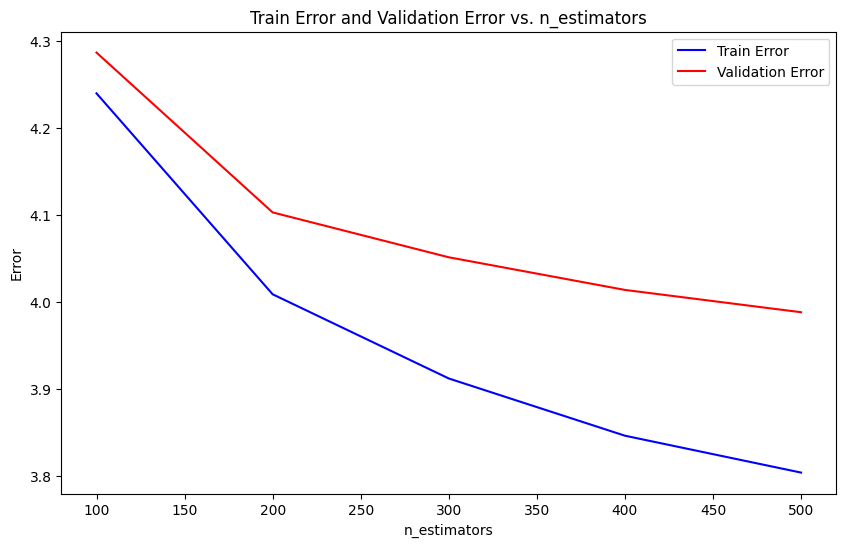

In [ ]:
best_param0=tuner('n_estimators',[100,200,300,400,500])

There is not a significant decrease in validation error after the value of 200 for n_estimator. Therefore, we will select 200 as the optimal value for n_estimator.

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a

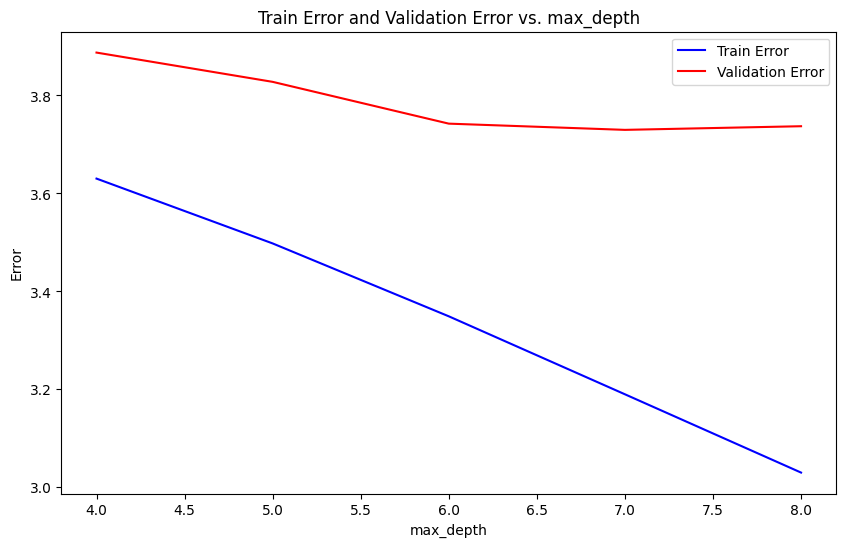

In [ ]:
best_param1=tuner('max_depth',[4,5,6,7,8])

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a

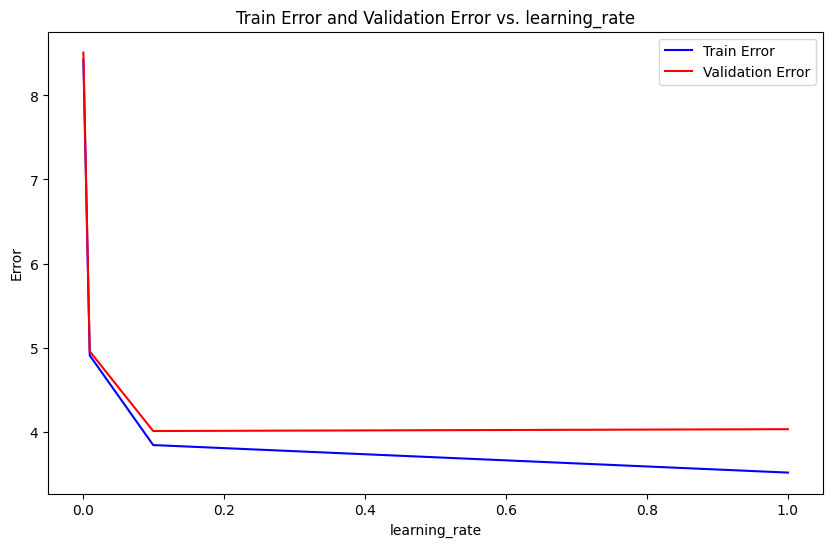

In [ ]:
best_param2=tuner('learning_rate',[1,.1,.01,.001])

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


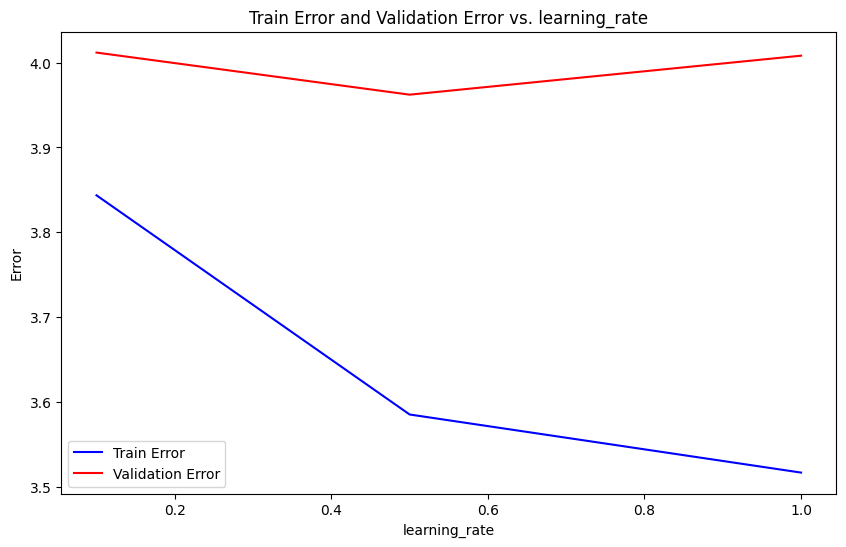

In [ ]:
best_param3=tuner('learning_rate',[.1,.5,1])

In [ ]:
best_params= {
      'max_depth':6,
      'loss':'squared_error',
      'n_estimators':200,
      'learning_rate':0.5,
      'criterion':'squared_error'
  }